In [5]:
import os

path = '/Users/jorgecamero/MOIRE-FRAUD-DETECTION'
print(os.path.exists(path))

for roots, dirs, files in os.walk(path):
    for file in files:
        if not file.endswith(('.jpg', '.png', '.jpeg', '.zip', '.txt', '.json', '.keras', '.py', '.pyc', '.ipynb', '.gitignore', '.gitattributes')):
            path = os.path.join(roots, file)
            if '.git' not in path:
                print(os.path.join(roots, file))
                #os.remove(os.path.join(roots, file))

True


In [1]:
import os

path = 'batch/Ataque'
img_list = [file for file in os.listdir(path) if file.lower().endswith(('.jpg', '.png', '.jpeg'))]

for idx, file in enumerate(img_list):
    filename = '_'.join(file.split('_')[3::])
    filename = f'{idx}_{filename}'
    print(os.path.join(path, filename))
    os.rename(os.path.join(path, file), os.path.join(path, filename))

FileNotFoundError: [Errno 2] No such file or directory: 'batch/Ataque'

In [18]:
import os
import shutil
from IPython.display import clear_output
import matplotlib.pyplot as plt

from utils import get_model, load_img, preprocess_img
from predict import predict_img
from read_json import get_scores

HEIGHT = 200
WIDTH = 350
model_path = '/Users/jorgecamero/Moire-Fraud-Detection/checkpoint/best_model.keras'
model = get_model(loadFlag=True, path=model_path)

path = '/Users/jorgecamero/MoireDataset/batch/Ataque'
img_list = [os.path.join(path, file) for file in os.listdir(path) if file.lower().endswith(('.jpg', '.png', '.jpeg'))]

cnt = 0
for idx, img_path in enumerate(img_list):
    img = load_img(img_path, width=WIDTH, height=HEIGHT)
    img_elements = preprocess_img(img)
    prediction_bin, prediction = predict_img(model, img_elements)
    
    if not prediction_bin:
        filename = os.path.basename(img_path)
        #output_path = os.path.join(outputDir, filename)
        plt.imshow(img)
        plt.title(filename)
        plt.axis('off')
        print(prediction)
        plt.draw()
        plt.pause(0.5)
        clear_output(wait=True)
        #shutil.move(img_path, output_path)
    else:
        cnt += 1
        print(f'Contador de aciertos: {cnt}/{len(img_list)}', end='\r')
        
print(f"Porcentaje de aciertos: {cnt}/{len(img_list)} - {round(cnt/len(img_list), 2)*100}%")

Porcentaje de aciertos: 357/482 - 74.0%


In [19]:
import os
import random
import matplotlib.pyplot as plt

from utils import get_model
from predict import predict_img
from utils import load_img, preprocess_img

model_path = '/Users/jorgecamero/Moire-Fraud-Detection/checkpoint/best_model.keras'
model = get_model(loadFlag=True, path=model_path)

Ataque
0.5162933


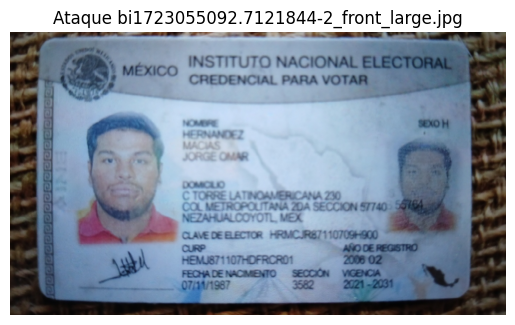

In [33]:
HEIGHT = 100
WIDTH = 175

path = '/Users/jorgecamero/MoireDataset/batchTrain'
folders = [os.path.join(path, folder) for folder in os.listdir(path) if os.path.isdir(os.path.join(path, folder))]
random_folder = random.choice(folders)

img_list = [os.path.join(random_folder, file) for file in os.listdir(random_folder) if file.lower().endswith(('.jpg', '.png', '.jpeg'))]
random_img = random.choice(img_list)

img = load_img(random_img, width=WIDTH, height=HEIGHT)
img_elements = preprocess_img(img, height=HEIGHT, width=WIDTH)
prediction_bin, prediction = predict_img(model, img_elements)
prediction_label = 'Ataque' if prediction_bin == 1 else 'Real'

plt.imshow(load_img(random_img, width=1400, height=800))
plt.title(f'{os.path.basename(random_folder)} {os.path.basename(random_img)}')
plt.axis('off')
print(prediction_label)
print(prediction)

# num_cols = 4
# num_rows = (len(img_elements) + num_cols - 1) // num_cols

# plt.figure(figsize=(12, 2 * num_rows))

# for idx, (name, element) in enumerate(img_elements.items()):
#     plt.subplot(num_rows, num_cols, idx + 1)
#     plt.imshow(element)
#     plt.axis('on')
#     plt.title(name)

# plt.tight_layout()
# plt.show()

In [13]:
import tensorflow as tf
import matplotlib.pyplot as plt

atack_cnt = 0

path = '/Users/jorgecamero/MoireDataset/batch'
folders = [os.path.join(path, folder) for folder in os.listdir(path) if os.path.isdir(os.path.join(path, folder))]
random_folder = random.choice(folders)

img_list = [os.path.join(random_folder, file) for file in os.listdir(random_folder) if file.lower().endswith(('.jpg', '.png', '.jpeg'))]
random_img = random.choice(img_list)

img = load_img(random_img, width=WIDTH, height=HEIGHT)
img_elements = preprocess_img(img)
prediction_bin, prediction = predict_img(model, img_elements)
atack_cnt = atack_cnt + 1 if prediction_bin == 1 else atack_cnt

# Procesar la imagen girada 180°
img_rotated_180 = tf.image.rot90(img, k=2)
img_rotated_180_elements = preprocess_img(img_rotated_180)
prediction_bin, prediction = predict_img(model, img_rotated_180_elements)
atack_cnt = atack_cnt + 1 if prediction_bin == 1 else atack_cnt

# Procesar la imagen girada 180° con giro vertical
img_rotated_180_flipped = tf.image.flip_up_down(img_rotated_180)
img_rotated_180_flipped_elements = preprocess_img(img_rotated_180_flipped)
prediction_bin, prediction = predict_img(model, img_rotated_180_flipped_elements)
atack_cnt = atack_cnt + 1 if prediction_bin == 1 else atack_cnt


prediction_label = 'Real' if atack_cnt < 2 else 'Ataque'
print(f"Predictions: {prediction_label}")
print(f"Atack_conf: {100*round(atack_cnt/3, 3):.3f}%")

plt.imshow(img)
plt.title(f'{os.path.basename(random_folder)}')
plt.axis('off')
plt.show()

NameError: name 'predict_img' is not defined

In [1]:
import os
import cv2
import random
import warnings
import mediapipe as mp
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore", category=UserWarning)
mp_face_detection = mp.solutions.face_detection
face_detection = mp_face_detection.FaceDetection(min_detection_confidence=0.4)

I0000 00:00:1729201603.855359  176640 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2
INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


In [2]:
path = '/Users/jorgecamero/MoireDataset/batch'
folders = [os.path.join(path, folder) for folder in os.listdir(path) if os.path.isdir(os.path.join(path, folder))]
random_folder = random.choice(folders)

img_list = [os.path.join(random_folder, file) for file in os.listdir(random_folder) if file.lower().endswith(('.jpg', '.png', '.jpeg'))]
random_img = random.choice(img_list)
image = cv2.imread(random_img)

image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

results = face_detection.process(image_rgb)
if results.detections is not None:
    for detection in results.detections:
        bboxC = detection.location_data.relative_bounding_box
        h, w, _ = image_rgb.shape
        h_prop, y_prop = (int(h/10), int(y/2))
        x, y, width, height = (bboxC.xmin * w, bboxC.ymin * h, bboxC.width * w, bboxC.height * h)
        if x < h/2:
            img_crop = image_rgb[int(y)-y_prop:int(y + height)+y_prop, int(x)-h_prop:int(x + width)+h_prop]
            img_crop = cv2.resize(img_crop, (175, 100), cv2.INTER_LINEAR)
            plt.imshow(img_crop)
            plt.axis('on')
            plt.show()
            
            cv2.rectangle(image_rgb, (int(x), int(y)), (int(x + width), int(y + height)), (0, 255, 0), 2)

plt.imshow(image_rgb)
plt.axis('on')
plt.show()

W0000 00:00:1729201603.857564  176784 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


NameError: name 'y' is not defined

In [1]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt

from utils import load_img, preprocess_img, preprocess_augmentation_img

HEIGHT = 200
WIDTH = 350

I0000 00:00:1729205638.047443  214832 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2
INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


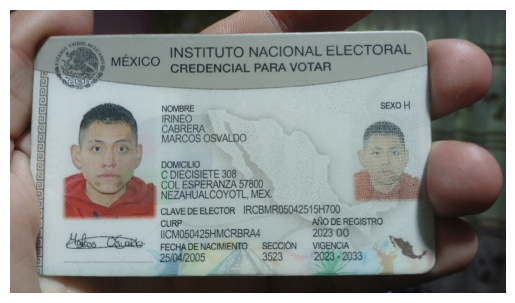

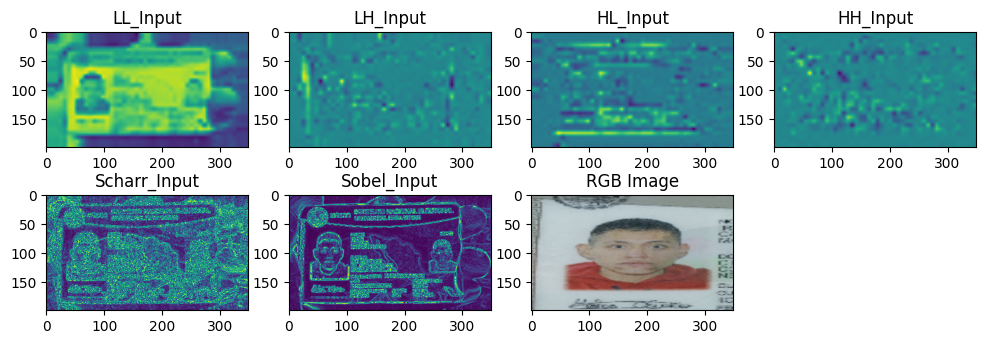

<Figure size 640x480 with 0 Axes>

In [10]:
path = '/Users/jorgecamero/MoireDataset/batch'
folders = [os.path.join(path, folder) for folder in os.listdir(path) if os.path.isdir(os.path.join(path, folder))]
random_folder = random.choice(folders)

img_list = [os.path.join(random_folder, file) for file in os.listdir(random_folder) if file.lower().endswith(('.jpg', '.png', '.jpeg'))]
random_img = random.choice(img_list)

img = load_img(random_img, width=WIDTH, height=HEIGHT)
img_elements = preprocess_img(img)

plt.imshow(load_img(random_img, width=1400, height=800))
plt.axis('off')

num_cols = 4
num_rows = (len(img_elements) + num_cols - 1) // num_cols

plt.figure(figsize=(12, 2 * num_rows))

for idx, (name, element) in enumerate(list(img_elements.items())[:-3]):
    plt.subplot(num_rows, num_cols, idx + 1)
    plt.imshow(element)
    plt.axis('on')
    plt.title(name)
    
rgb_channels = list(img_elements.items())[-3:]
rgb_image = np.stack([np.squeeze(element) for _, element in rgb_channels], axis=-1)

plt.imshow(rgb_image.astype(np.uint8))
plt.axis('on')
plt.title('RGB Image')
plt.show()

plt.tight_layout()
plt.show()